<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_6/Competitive_DS_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.3.3

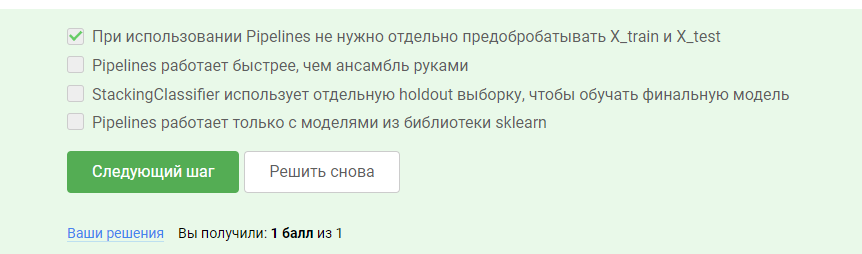

# 6.3.4

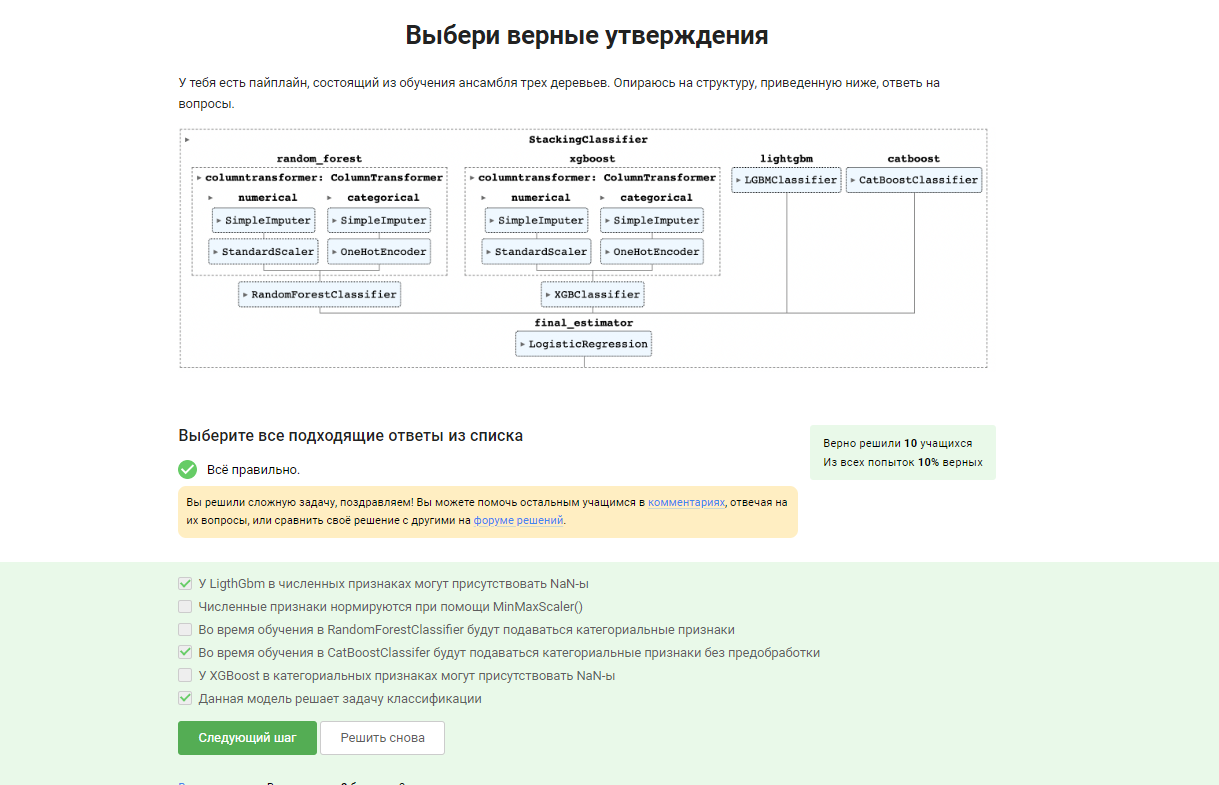

# 6.3.5

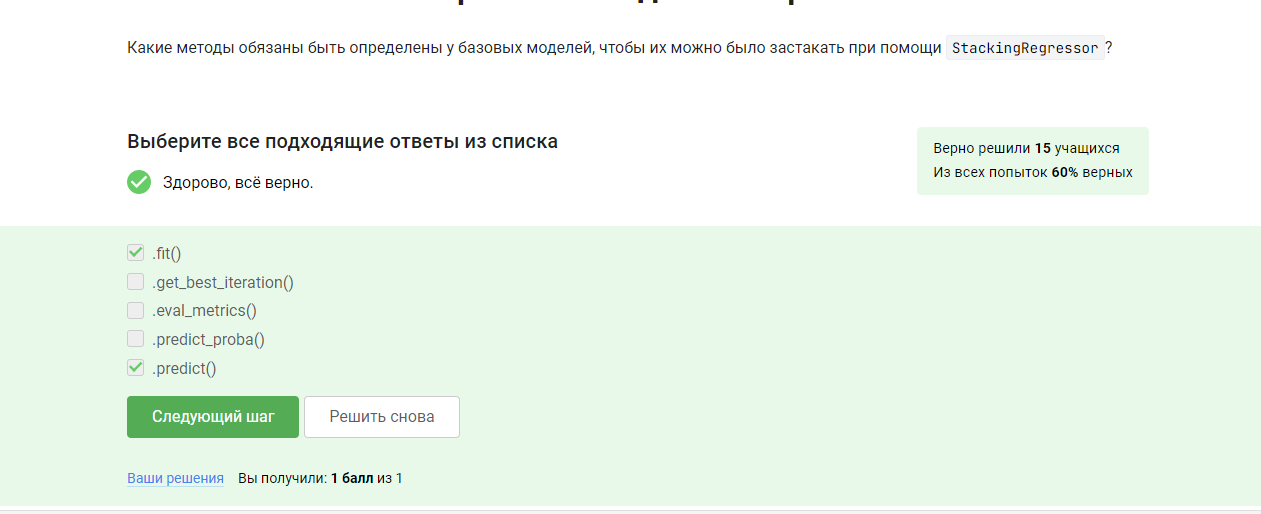

# 6.3.6

При помощи sklearn.Pipelines напишите свой categorical_transformer, который принимает на вход pd.DataFrame состоящий только из категориальных признаков, заполняет пропуски строкой 'Unknown', а потом делает one hot encoding.

Примечание: Не нужно писать это руками, воспользуйтесь трансформерами из sklearn.impute и sklearn.preprocessing

In [ ]:
# my

import sklearn

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='Unknown')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

data_pred = categorical_transformer.fit_transform(data[categorical_features])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {'Id': [1, 2, 3, 4, 5, 6, 7, 8],
         
        'Gender': ['M', 'M', 'F', np.nan,
                   np.nan, 'F', 'M', 'F'],
         
        'Color': [np.nan, "Red", "Blue",
                  "Red", np.nan, "Red",
                  "Green", np.nan]}
 
# convert to data frame
df = pd.DataFrame(data)
display(df)

,Id,Gender,Color
0,1,M,NaN
1,2,M,Red
2,3,F,Blue
3,4,NaN,Red
4,5,NaN,NaN
5,6,F,Red
6,7,M,Green
7,8,F,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      8 non-null      int64 
 1   Gender  6 non-null      object
 2   Color   5 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

In [ ]:
categorical_features = ['Gender', 'Color']

In [ ]:
import sklearn

categorical_transformer =  Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='Unknown')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

data_pred = categorical_transformer.fit_transform(df[categorical_features])

# 6.3.7

Напишите свой numerical_transformer, который принимает на вход pd.DataFrame состоящий только из численных признаков. Он должен заполнить пропуски медианой, потом нормализовать данные с помощью MinMaxScaler и наконец отобрать топ-5 признаков с наибольшим значением функции ANOVA F-value.

Примечание: Не нужно писать это руками, воспользуйтесь трансформерами из sklearn 

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
data = {'Id': [1, 2, 3, 4, 5, 6, 7, 8],
         
        'Gender': [1, 3, 5, np.nan,
                   np.nan, 5, 1000, 5],
         
        'Color': [np.nan, 3, 8,
                  10, np.nan, 15,
                  20, np.nan],
        
        'Color1': [np.nan, 3, 8,
                  10, np.nan, 15,
                  20, np.nan],
        
        'Color2': [np.nan, 3, 8,
                  10, np.nan, 15,
                  20, np.nan],
        
        'target': [1, 0, 1,
                  1, 0, 0,
                  1, 0],
        }
 
# convert to data frame
df = pd.DataFrame(data)
display(df)

,Id,Gender,Color,Color1,Color2,target
0,1,1.0,NaN,NaN,NaN,1
1,2,3.0,3.0,3.0,3.0,0
2,3,5.0,8.0,8.0,8.0,1
3,4,NaN,10.0,10.0,10.0,1
4,5,NaN,NaN,NaN,NaN,0
5,6,5.0,15.0,15.0,15.0,0
6,7,1000.0,20.0,20.0,20.0,1
7,8,5.0,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      8 non-null      int64  
 1   Gender  6 non-null      float64
 2   Color   5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


In [ ]:
numerical_features = ['Gender', 'Color']

In [ ]:
import sklearn

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ('minmax', MinMaxScaler()),
    # ("selector", SelectKBest(k=2))
    ]
    )

data_pred = numerical_transformer.fit_transform(df[numerical_features]
                                                , df['target']
                                                )

data_pred

array([[0.        , 0.        ],
       [0.002002  , 0.        ],
       [0.004004  , 0.29411765],
       [0.004004  , 0.41176471],
       [0.004004  , 0.        ],
       [0.004004  , 0.70588235],
       [1.        , 1.        ],
       [0.004004  , 0.        ]])

In [ ]:
# my

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ('minmax', MinMaxScaler()),
    ("selectorkbest", SelectKBest(k=5))])

data_pred = numerical_transformer.fit_transform(data[numerical_features], data['target'])

# 6.3.8

Пишем data_transformer
Теперь объедините предыдущие два шага вместе, чтобы на numerical_features ваш трансформер вызывал numerical_transformer, а на categorical_features использовал categorical_transformer.

Примечание:  categorical_transformer и numerical_transformer считайте уже объявленными.

In [ ]:
import sklearn

data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)])

data_pred = data_transformer.fit_transform(data, data['target'])

# 6.3.9

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

Считываем данные

In [ ]:
from sklearn import preprocessing
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/quickstart_train.csv')

categorical_features = ['model', 'car_type', 'fuel_type']

for cat in categorical_features:
    lbl = preprocessing.LabelEncoder()
    data[cat] = lbl.fit_transform(data[cat].astype(str))
    data[cat] = data[cat].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   car_id                    2337 non-null   object  
 1   model                     2337 non-null   category
 2   car_type                  2337 non-null   category
 3   fuel_type                 2337 non-null   category
 4   car_rating                2337 non-null   float64 
 5   year_to_start             2337 non-null   int64   
 6   riders                    2337 non-null   int64   
 7   year_to_work              2337 non-null   int64   
 8   target_reg                2337 non-null   float64 
 9   target_class              2337 non-null   object  
 10  mean_rating               2337 non-null   float64 
 11  distance_sum              2337 non-null   float64 
 12  rating_min                2337 non-null   float64 
 13  speed_max                 2337 non-null   float6

In [ ]:
!pip install catboost -q

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import lightgbm as lgbm
import xgboost as xgb
import catboost as cb

In [ ]:
# значения таргета закодируем целыми числами
class_names = np.unique(data['target_class'])
data['target_class'] = data['target_class'].replace(class_names, np.arange(data['target_class'].nunique()))
cols2drop = ['car_id', 'target_reg', 'target_class']
categorical_features = ['model', 'car_type', 'fuel_type']
numerical_features = [c for c in data.columns if c not in categorical_features and c not in cols2drop]
X_train, X_val, y_train, y_val = train_test_split(data.drop(cols2drop, axis=1), 
                                                    data['target_class'],
                                                    test_size=.25,
                                                    stratify=data['target_class'],
                                                    random_state=42)
print(X_train.shape, X_val.shape)

(1752, 14) (585, 14)


In [ ]:
params_rf = {
             'n_estimators' : 700,
              # # 'learning_rate': .03,
              # 'depth' : 3,
              # 'verbose': False,
              # 'use_best_model': True,
              # # 'cat_features' : categorical_features,
              # 'text_features': [],
              # # 'train_dir' : '/home/jovyan/work/catboost',
              # 'border_count' : 64,
              # 'l2_leaf_reg' : 1,
              # 'bagging_temperature' : 2,
              # 'rsm' : 0.51,
              # 'loss_function': 'MultiClass',
              # 'auto_class_weights' : 'Balanced', #try not balanced
              # 'random_state': 42,
              # 'use_best_model': False,
              # # 'custom_metric' : ['AUC', 'MAP'] # Не работает внутри Sklearn.Pipelines
         }

random_forest_model = RandomForestClassifier(**params_rf)

In [ ]:
params_cat = {
             'n_estimators' : 700,
              # 'learning_rate': .03,
              'depth' : 3,
              'verbose': False,
              'use_best_model': True,
              # 'cat_features' : categorical_features,
              'text_features': [],
              # 'train_dir' : '/home/jovyan/work/catboost',
              'border_count' : 64,
              'l2_leaf_reg' : 1,
              'bagging_temperature' : 2,
              'rsm' : 0.51,
              'loss_function': 'MultiClass',
              'auto_class_weights' : 'Balanced', #try not balanced
              'random_state': 42,
              'use_best_model': False,
              # 'custom_metric' : ['AUC', 'MAP'] # Не работает внутри Sklearn.Pipelines
         }

cat_model = cb.CatBoostClassifier(**params_cat)

In [ ]:

params_lgbm = {
    "num_leaves": 200,
    "n_estimators": 1500,
    # "max_depth": 7,
    "min_child_samples": None,
    "learning_rate": 0.001,
    "min_data_in_leaf": 5,
    "feature_fraction": 0.98,
    # "categorical_feature": cat_cols,
    'reg_alpha' : 3.0,
    'reg_lambda' : 5.0,
    # 'categorical_feature': categorical_features_index
}
lgbm_model = lgbm.LGBMClassifier(**params_lgbm)

In [ ]:
params_xgb = {
    "eta": 0.05,
    'n_estimators' : 1500,
    "max_depth": 6,
    "subsample": 0.7,
    # "colsample_bytree": 0.95,
    'min_child_weight' : 0.1,
    'gamma': .01,
    'reg_lambda' : 0.1,
    'reg_alpha' : 0.5,
    "objective": "reg:linear",
    "eval_metric": "mae",
    'tree_method' : 'hist', # Supported tree methods for cat fs are `gpu_hist`, `approx`, and `hist`.
    'enable_categorical' : True
    
}
xgb_model = xgb.XGBClassifier(**params_xgb)

In [ ]:
# Вспомогательные блоки организации для пайплайна
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [ ]:
# заменяет пропуски самым частым значением и делает ohe
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
# заменяет пропуски средним значением и делает номрализацию
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])
# соединим два предыдущих трансформера в один
data_transofmer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)])

data_transofmer


ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['car_rating', 'year_to_start', 'riders',
                                  'year_to_work', 'mean_rating', 'distance_sum',
                                  'rating_min', 'speed_max',
                                  'user_ride_quality_median',
                                  'deviation_normal_count', 'user_uniq']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['model', 'car_type', 'fuel_type'])])

In [ ]:
import sklearn

# random_forest_model = make_pipeline(data_transofmer, RandomForestClassifier(data_transofmer, ))

random_forest_model=RandomForestClassifier()

models = {'random_forest': random_forest_model,
          'xgboost': xgb_model,
          'lightgbm': lgbm_model,
          'catboost': cat_model}


# estimators = [

    
#     ("random_forest",  make_pipeline(data_transofmer, RandomForestClassifier(n_estimators = 10_000, max_depth = 6, min_samples_leaf = 2, 
#                                                               bootstrap = True, class_weight = 'balanced', # ccp_alpha = 0.001, 
#                                                               random_state = 75, verbose=False, n_jobs=-1,))),
    

#     ("xgboost", make_pipeline(data_transofmer, xgb_model)),
#     ("lightgbm", lgbm_model),
#     ("catboost", cat_model),
 
    
 


# ]

estimators = [('random_forest', make_pipeline(data_transofmer, models['random_forest'])),
              ('xgboost', make_pipeline(data_transofmer, models['xgboost'])),
              ("lightgbm", models['lightgbm']),
              ("lightgbm", models['catboost']),
              ]
# data_transformer уже объявлен

meta_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(verbose=False),
    n_jobs=-1,
    verbose=False,
)

stacking_classifer = meta_model
stacking_classifer

StackingClassifier(estimators=[('random_forest',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('numerical',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['car_rating',
                                                                                   'year_to_start',
                                                                                   'riders',
                                                                                   'year_to_work',
                                                                                   'mean_rating',
                                                                                   'distance_sum',
                                                                                   'rating_min',
                                                                                   'speed_max',
                                                                                   'user_ride_quality_median',
                                                                                   'deviation_...
                                                               objective='reg:linear', ...))])),
                               ('lightgbm',
                                LGBMClassifier(feature_fraction=0.98,
                                               learning_rate=0.001,
                                               min_child_samples=None,
                                               min_data_in_leaf=5,
                                               n_estimators=1500,
                                               num_leaves=200, reg_alpha=3.0,
                                               reg_lambda=5.0)),
                               ('lightgbm',
                                <catboost.core.CatBoostClassifier object at 0x7f03186dc8b0>)],
                   final_estimator=LogisticRegression(verbose=False), n_jobs=-1,
                   verbose=False)

In [ ]:
models = {'random_forest': 2,
          'xgboost': 3,
          'lightgbm': 5,
          'catboost': 10}

print(*models)

random_forest xgboost lightgbm catboost


In [ ]:
details = {"name": "John", "age": 30}
print(*details)

name age


In [ ]:
estimators = [("random_forest",  make_pipeline(data_transformer, RandomForestClassifier()),
    ("xgboost", make_pipeline(data_transformer, xgb_model)),
    ("lightgbm", lgbm_model),
    ("catboost", cat_model)]

SyntaxError: ignored

In [ ]:
models = {'random_forest': random_forest_model,
          'xgboost': xgb_model,
          'lightgbm': lgbm_model,
          'catboost': cat_model}

In [ ]:
# my variant


import sklearn

models = {'random_forest': random_forest_model,
          'xgboost': xgb_model,
          'lightgbm': lgbm_model,
          'catboost': cat_model}

# data_transformer уже объявлен

estimators = [('random_forest', make_pipeline(data_transformer, models['random_forest'])),
              ('xgboost', make_pipeline(data_transformer, models['xgboost'])),
              ("lightgbm", models['lightgbm']),
              ("catboost", models['catboost']),
              ]

meta_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(verbose=False),
    # n_jobs=-1,
    verbose=False,
)

stacking_classifer = meta_model

In [ ]:
# original

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

models = {'random_forest': random_forest_model,
          'xgboost': xgb_model,
          'lightgbm': lgbm_model,
          'catboost': cat_model}

# data_transformer уже объявлен

estimators = [
    ("random_forest",  make_pipeline(data_transformer, random_forest_model)),
    ("xgboost",  make_pipeline(data_transformer, xgb_model)),
    ("lightgbm", lgbm_model),
    ("catboost", cat_model),
]

# в качестве мета-модели будем использовать LogisticRegression
stacking_classifer = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(verbose=False),
    n_jobs=1,
    verbose=False,
)

# 6.3.10

Hard* Пишем свой text_transformer
В этой задаче вам необходимо реализовать кастомный text_transformer, который можно будет встраивать в sklearn.Pipelines().

Подробно про то, как реализовать свой трансформер вы можете прочитать здесь.

Ваш трансформер должен работать с текстовыми столбцами и делать следующие преобразования:

1) Удалите из текста стоп-слова, которые задаются списком в параметрах транформера

2) Нормализуйте слова при помощи get_normal_string(). То есть каждое слово нужно заменить на get_normal_string(word) для всех слов в тексте.

3) Cчитайте, что слова разделены пробелами

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/text_classification_train.csv')

In [ ]:
df = data.copy()
df = df[['category', 'text']]
df.head()

,category,text
0,extreme,Ледник Пасторури это цирковой ледник расположе...
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...
3,autosport,В Сильверстоуне произошли крупные обновления а...
4,extreme,На протяжении более чем 30 лет Вестсайд являет...


In [ ]:
df[['text']]

,text
0,Пасто это цирко ледни распо в южной части Корд...
1,участ предс Betok 274 лицом к лицу Андре Кореш...
2,Ttoke Btoke – карта с котор можно не тольк тра...
3,В Сильв произ крупн обнов автом Мерсе Альпи Ас...
4,На протя более чем 30 лет Вестс являе ведущ но...
...,...
7495,Яркий откры шлем. ⠀ Внешн оболо из высок техно...
7496,Никто не рожда с идеал телом Но если вы хотит ...
7497,Друзь всем приве 33 В февра прода свою Honto X...
7498,Дании Медве во время четве сета Как же ему вез...


In [ ]:
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()

        for i in X_['text']:
            i = [get_normal_string(word) for word in i.split() if words not in stop_words_list]
        return X_

In [ ]:
stop_words_list = ['Ледник', 'Главные']

In [ ]:
for i in df['text']:
  i = [words for words in i.split() if words not in stop_words_list]

In [ ]:
df['text'] = [i for i in df['text'][i].split() if i not in stop_words_list]

KeyError: ignored

In [ ]:
def preprocess_txt(line):

    stop_words_list = ['Ледник', 'Главные']
    # line_split = line.split()
    # line_split = [i for i in line_split if i not in stop_words_list]

    line_split = [i for i in line.split() if i not in stop_words_list]

    # spls = "".join(i for i in line.strip() if i not in stop_words_list).split()
    # spls = [morpher.parse(i.lower())[0].normal_form for i in spls]
    # spls = [i for i in spls if i not in sw and i != ""]
    # return #spls 
    return line_split

  

df.apply(preprocess_txt)

0       [Пасторури, это, цирковой, ледник, расположенн...
1       [участники, предстоящего, Betokenoid, 274, лиц...
2       [Ttokenoid, Btokenoid, –, карта, с, которой, м...
3       [В, Сильверстоуне, произошли, крупные, обновле...
4       [На, протяжении, более, чем, 30, лет, Вестсайд...
                              ...                        
6097    [Внимание, 33, Команды, которые, одержали, 3, ...
6098    [MotoGP, Dtokenoid, Lenovo, Team, –, лучшая, к...
6099    [В, последний, раз, NAVI, выигрывали, матч, со...
6100    [Если, хочешь, быть, лучше, других, будь, гото...
6101    [Какой, грязнуля, А, как, часто, вы, моете, св...
Length: 6102, dtype: object

In [ ]:
def preprocess_txt(row):
    # print(row)

    stop_words_list = ['Ледник', 'Главные']
    # line_split = line.split()
    # line_split = [i for i in line_split if i not in stop_words_list]
    # print(row['text'])
    row['text'] = [i for i in row['text'].split() if i not in stop_words_list]

    # spls = "".join(i for i in line.strip() if i not in stop_words_list).split()
    # spls = [morpher.parse(i.lower())[0].normal_form for i in spls]
    # spls = [i for i in spls if i not in sw and i != ""]
    # return #spls 
    return row

  
df.apply(preprocess_txt, axis=1)
# df = df['text'].apply(preprocess_txt)

,category,text
0,extreme,"[Пасторури, это, цирковой, ледник, расположенн..."
1,martial_arts,"[участники, предстоящего, Betokenoid, 274, лиц..."
2,extreme,"[Ttokenoid, Btokenoid, –, карта, с, которой, м..."
3,autosport,"[В, Сильверстоуне, произошли, крупные, обновле..."
4,extreme,"[На, протяжении, более, чем, 30, лет, Вестсайд..."
...,...,...
7495,motosport,"[Яркий, открытый, шлем., ⠀, Внешняя, оболочка,..."
7496,martial_arts,"[Никто, не, рождается, с, идеальным, телом., Н..."
7497,motosport,"[Друзья, всем, привет, 33, В, феврале, продал,..."
7498,tennis,"[Даниил, Медведев, во, время, четвертого, сета..."


In [ ]:
df[['text']]

,text
0,Ледник Пасторури это цирковой ледник расположе...
1,Главные участники предстоящего Betokenoid 274 ...
2,Ttokenoid Btokenoid – карта с которой можно не...
3,В Сильверстоуне произошли крупные обновления а...
4,На протяжении более чем 30 лет Вестсайд являет...
...,...
7495,Яркий открытый шлем. ⠀ Внешняя оболочка из выс...
7496,Никто не рождается с идеальным телом. Но если ...
7497,Друзья всем привет 33 В феврале продал свою Ho...
7498,Даниил Медведев во время четвертого сета Как ж...


In [ ]:
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        print(type(X_))

        # print(X_)

        def preprocess_txt(line):

          line_split = [i for i in line.split() if i not in self.stop_words_list]
          return line_split

        # print(self.stop_words_list)
        
        # for i in X_:
        #   # print(i[0].split())
        #   # self.stop_words_list
        #   # i = [word for word in i[0].split() if word not in self.stop_words_list]
        #   # i = [get_normal_string(word) for word in i[0].split() if word not in self.stop_words_list]
        #   el = [word for word in i[0].split() if word not in self.stop_words_list]
        #   i = el

        b = []
        # print(b)
        for i in range(len(X_)):
            # print(X_[i][0].split())
            el = ' '.join([word for word in X_[i][0].split() if word not in self.stop_words_list])
            # el = ' '.join([get_normal_string(word) for word in X_[i][0].split() if word not in self.stop_words_list])
            # print(el)
            b.append(el)
        # print(b)
        # b = np.array(b)
        X_ = b
        return X_

In [ ]:
text_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='')),
    ("scaler", TextTransformer(stop_words_list))
])

text_transformers.fit_transform(df[['text']])

In [ ]:
a = ['Пасторури', 'это', 'цирковой', 'ледник', 'расположенный', 'в', 'южной', 'части', 'Кордильеры', 'Бланка', 'части', 'горного', 'хребта', 'Анд', 'на', 'севере', 'Перу', 'в', 'регионе', 'Анкаш.']

In [ ]:
a = ' '.join(a)
a

'Пасторури это цирковой ледник расположенный в южной части Кордильеры Бланка части горного хребта Анд на севере Перу в регионе Анкаш.'

In [ ]:
df

,category,text
0,extreme,Ледник Пасторури это цирковой ледник расположе...
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...
3,autosport,В Сильверстоуне произошли крупные обновления а...
4,extreme,На протяжении более чем 30 лет Вестсайд являет...
...,...,...
7495,motosport,Яркий открытый шлем. ⠀ Внешняя оболочка из выс...
7496,martial_arts,Никто не рождается с идеальным телом. Но если ...
7497,motosport,Друзья всем привет 33 В феврале продал свою Ho...
7498,tennis,Даниил Медведев во время четвертого сета Как ж...


In [ ]:
import numpy as np

In [ ]:
a = np.array(
    [['Ледник Пасторури это цирковой'], ['Главные участники предстоящего Betokenoid']]

)

In [ ]:
stop_words_list = ['Ледник', 'Главные']

b = []
for i in range(len(a)):
  # print(a[i][0].split())
  el = [word for word in a[i][0].split() if word not in stop_words_list]
  b.append(el)

b = np.array(b)

In [ ]:
b

array([['Пасторури', 'это', 'цирковой'],
       ['участники', 'предстоящего', 'Betokenoid']], dtype='<U12')

In [ ]:
type(a[0])

numpy.ndarray

In [ ]:
a[0].split()

['Мужики',
 'скиньте',
 'фото',
 'как',
 'у',
 'кого',
 'проводка',
 'уложенная',
 'под',
 'сиденьем.']

In [ ]:
df = data.copy()
df = df[['category', 'text']]
df.head()

,category,text
0,extreme,Ледник Пасторури это цирковой ледник расположе...
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...
3,autosport,В Сильверстоуне произошли крупные обновления а...
4,extreme,На протяжении более чем 30 лет Вестсайд являет...


In [ ]:
c = df[['text']]

In [ ]:
!pip install pymorphy2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pymorphy2 import MorphAnalyzer

In [ ]:
word = 'ходил'

morpher = MorphAnalyzer()

word = morpher.parse(word.lower())
# word.sort()
word[0][2]

'ходить'

In [ ]:
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

stop_words_list = ['и', 'что', 'Ледник']

df = data.copy()
df = df[['category', 'text']]

morpher = MorphAnalyzer()

def get_normal_string(word):
  #  word = morpher.parse(word.lower())[0][2]
   return word[0:5]


class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        res = np.array([[]])
        for i in range(len(X)):

          # el = [get_normal_string(word) for word in X[i][0].split(' ') if word not in self.stop_words_list]
          # el = ' '.join(el)

          # res = np.append(res, el)
          res = np.append(res, ' '.join([get_normal_string(word) for word in X[i][0].split(' ') if word not in self.stop_words_list]))
        
        # print(type(res))
        return res, X

In [ ]:
df = data.copy()
df = df[['category', 'text']]
df

,category,text
0,extreme,Ледник Пасторури это цирковой ледник расположе...
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...
3,autosport,В Сильверстоуне произошли крупные обновления а...
4,extreme,На протяжении более чем 30 лет Вестсайд являет...
...,...,...
7495,motosport,Яркий открытый шлем. ⠀ Внешняя оболочка из выс...
7496,martial_arts,Никто не рождается с идеальным телом. Но если ...
7497,motosport,Друзья всем привет 33 В феврале продал свою Ho...
7498,tennis,Даниил Медведев во время четвертого сета Как ж...


In [ ]:
df = data.copy()
df = df[['category', 'text']]

text_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='')),
    ("scaler", TextTransformer(stop_words_list))
])

rs_, X_ = text_transformers.fit_transform(df[['text']])
# df['text'] = text_transformers.fit_transform(df[['text']])
# df[['text']] = rs
# # print(type(rs))
# df


In [ ]:
rs_

array(['Пасто это цирко ледни распо в южной части Корди Бланк части горно хребт Анд на север Перу в регио Анкаш',
       'Главн участ предс Betok 274 лицом к лицу Андре Кореш vs Ченси Ренка Нейма Грейс vs Логан Сторл Георг Карах vs Адам Пикко VIA mmajt андре кореш',
       'Ttoke Btoke – карта с котор можно не тольк трати но зараб До 30 кэшбэ рубля Обслу от 0 руб. До 7 на остат',
       ...,
       'Друзь всем приве 33 В февра прода свою Honto X4 владе 3 года за время владе помен кольц ремко карба подки РР счаст катал ну а че Хонда ж не ломае С насту тепла возни желан опять сесть на мотоц Исход из вышеи прошу владе полно в г. Красн чиркн в л. с. Дабы встре в живую бахну кофей Всем мира добра 33 Срач в комен приве',
       'Дании Медве во время четве сета Как же ему везет 33 Не мог предс он такой везуч',
       'MotoG Aprto пытаю запол контр с Red Btoke Масси Ривол переж очень напря перио своей карье в роли генер дирек Aprto Ratok Вероя прият напря 33 Aprto справ с перво трудн тепер рез

In [ ]:
X_

array([['Ледник Пасторури это цирковой ледник расположенный в южной части Кордильеры Бланка части горного хребта Анд на севере Перу в регионе Анкаш.'],
       ['Главные участники предстоящего Betokenoid 274 лицом к лицу Андрей Корешков vs Ченси Ренкаунтри Нейман Грейси vs Логан Сторли Георгий Караханян vs Адам Пикколотти VIA mmajtokenoid андрейкорешков корешков'],
       ['Ttokenoid Btokenoid – карта с которой можно не только тратить но и зарабатывать До 30 кэшбэк рублями Обслуживание от 0 руб. До 7 на остаток'],
       ...,
       ['Друзья всем привет 33 В феврале продал свою Hontokenoid X4 владел 3 года за время владения поменял кольца и ремкомплект карба подкинул РР и счастливый катался ну а че Хонда ж не ломается. С наступлением тепла возникло желание опять сесть на мотоцикл. Исходя из вышеизложенного прошу владельца полносила в г. Краснодар чиркнуть в л. с. Дабы встретиться в живую и бахнуть кофейку. Всем мира и добра 33 Срач в коментах приветствуется'],
       ['Даниил Медведев в

In [ ]:
rs_.shape

(7500,)

In [ ]:
rs = np.reshape(rs_, (7500, 1))

In [ ]:
rs

array([['Пасто это цирко ледни распо в южной части Корди Бланк части горно хребт Анд на север Перу в регио Анкаш'],
       ['Главн участ предс Betok 274 лицом к лицу Андре Кореш vs Ченси Ренка Нейма Грейс vs Логан Сторл Георг Карах vs Адам Пикко VIA mmajt андре кореш'],
       ['Ttoke Btoke – карта с котор можно не тольк трати но зараб До 30 кэшбэ рубля Обслу от 0 руб. До 7 на остат'],
       ...,
       ['Друзь всем приве 33 В февра прода свою Honto X4 владе 3 года за время владе помен кольц ремко карба подки РР счаст катал ну а че Хонда ж не ломае С насту тепла возни желан опять сесть на мотоц Исход из вышеи прошу владе полно в г. Красн чиркн в л. с. Дабы встре в живую бахну кофей Всем мира добра 33 Срач в комен приве'],
       ['Дании Медве во время четве сета Как же ему везет 33 Не мог предс он такой везуч'],
       ['MotoG Aprto пытаю запол контр с Red Btoke Масси Ривол переж очень напря перио своей карье в роли генер дирек Aprto Ratok Вероя прият напря 33 Aprto справ с перво труд

In [ ]:
X_.shape

(7500, 1)

In [ ]:
df['text'] = rs

In [ ]:
len(rs)

7500

In [ ]:
l = np.array([[]])
l

array([], shape=(1, 0), dtype=float64)

In [ ]:
m = np.append(l, [1,2])
m

array([1., 1., 2., 1., 2.])

In [ ]:
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

stop_words_list = ['и', 'что', 'Ледник']

df = data.copy()
df = df[['category', 'text']]
df.head()

morpher = MorphAnalyzer()

def get_normal_string(word):
  #  word = morpher.parse(word.lower())[0][2]
   return word[0:5]


class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        res = []
        for i in range(len(X)):

            el = [get_normal_string(word) for word in X[i][0].split()]
            el = [word for word in el if word not in self.stop_words_list]
            el = ' '.join(el)
            res.append(el)

        res = np.array(res)

        return res

text_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='')),
    ("scaler", TextTransformer(stop_words_list))
])

df['text'] = text_transformers.fit_transform(df[['text']])

df

,category,text
0,extreme,Ледни Пасто это цирко ледни распо в южной част...
1,martial_arts,Главн участ предс Betok 274 лицом к лицу Андре...
2,extreme,Ttoke Btoke – карта с котор можно не тольк тра...
3,autosport,В Сильв произ крупн обнов автом Мерсе Альпи Ас...
4,extreme,На протя более чем 30 лет Вестс являе ведущ но...
...,...,...
7495,motosport,Яркий откры шлем. ⠀ Внешн оболо из высок техно...
7496,martial_arts,Никто не рожда с идеал телом Но если вы хотит ...
7497,motosport,Друзь всем приве 33 В февра прода свою Honto X...
7498,tennis,Дании Медве во время четве сета Как же ему вез...


In [ ]:
class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        res = []
        for i in range(0, len(X)):
            el = ' '.join([get_normal_string(word) for word in X[i][0].split() if word not in self.stop_words_list])
            res.append(el)
        
        res = np.array(res)
        #print(res)
        return res

In [ ]:
a = ['Финальная', 'пресс', 'конференция', 'перед', 'боем', 'Тайсона', 'Фьюри', 'Диллиана', 'Уайта']
a = ' '.join(a)
a

'Финальная пресс конференция перед боем Тайсона Фьюри Диллиана Уайта'

In [ ]:
text_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='')),
    ("scaler", TextTransformer(stop_words_list))
])

df['text'] = text_transformers.fit_transform(df[['text']])

df

,category,text
0,extreme,Пасторури это цирковой ледник расположенный в ...
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...
3,autosport,В Сильверстоуне произошли крупные обновления а...
4,extreme,На протяжении более чем 30 лет Вестсайд являет...
...,...,...
7495,motosport,Яркий открытый шлем. ⠀ Внешняя оболочка из выс...
7496,martial_arts,Никто не рождается с идеальным телом. Но если ...
7497,motosport,Друзья всем привет 33 В феврале продал свою Ho...
7498,tennis,Даниил Медведев во время четвертого сета Как ж...


In [ ]:
X = df[['text']]

In [ ]:
X.iloc[0][0]

'Ледник Пасторури это цирковой ледник расположенный в южной части Кордильеры Бланка части горного хребта Анд на севере Перу в регионе Анкаш.'

In [ ]:
type(df[['text']])

pandas.core.frame.DataFrame

In [ ]:

# download stopwords
import nltk
nltk.download('stopwords')
 
# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)
print(stop_words_list)

['mustn', 'as', 'couldn', 'yours', 'were', 'my', 'too', 'i', 'or', "wasn't", 'ain', 'hadn', "that'll", 'what', 'if', 'll', "haven't", 'no', 'here', "mightn't", 'm', 'an', 'both', "aren't", "shouldn't", 'more', 'from', 'itself', 're', "it's", 'where', 'again', "didn't", 'wouldn', 'shan', 'there', 'theirs', 'should', "couldn't", "needn't", 'some', 'them', 'few', 'its', 'to', 'further', "you'd", 'ourselves', 'herself', "doesn't", 'whom', 'when', 'while', 'aren', 'until', 'over', 'our', "you'll", 'shouldn', 'only', 'mightn', 'it', 'then', "weren't", 'you', 'needn', 'during', 'nor', 'am', 'all', 'hers', 'this', 'by', 'own', 's', 'he', 'being', 'y', 'into', 'because', 'below', 'haven', "shan't", 'any', 'about', 'in', 'o', 'those', 'other', 'they', 'after', 'above', 'most', 'doing', "wouldn't", 'yourselves', 'each', 'through', 'under', 'than', 'didn', 'isn', 'for', 'how', 'do', 've', 'was', "you've", 'does', 'doesn', "hadn't", 'weren', "she's", 'with', 'up', 't', 'against', 'out', 'off', "don

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

import nltk
from pymorphy2 import MorphAnalyzer

# stop_words_list = ['Ледник', 'Главные']

stop_words_list= ['mustn', 'as', 'couldn', 'yours', 'were', 'my', 'too', 'i', 'or', "wasn't",'Ледник', 'Главные', 'я']


morpher = MorphAnalyzer()

#def get_normal_string(word):
 #  word = morpher.parse(word.lower())[0][2]
#   return word

class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # X_ = X.copy()
        #print(type(X))
        b = []
        for i in range(len(X)):
            # el = ' '.join([word for word in X_[i][0].split() if word not in self.stop_words_list])
            #el = ' '.join([get_normal_string(word) for word in X[i][0].split() if word not in self.stop_words_list])
            #el = ' '.join([word for word in X[i][0].split() if word not in self.stop_words_list])
            #el = get_normal_string(el)
            el = [get_normal_string(word) for word in X[i][0].split() if word not in self.stop_words_list]
            
            for word in el:
                b.append(word)

        b = np.array(b)

        return b

In [ ]:
class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # X_ = X.copy()
        #print(type(X))
        b = []
        for i in range(len(X)):
            # el = ' '.join([word for word in X_[i][0].split() if word not in self.stop_words_list])
            el = ' '.join([get_normal_string(word) for word in X[i][0].split() if word not in self.stop_words_list])
            #el = ' '.join([word for word in X[i][0].split() if word not in self.stop_words_list])
            #el = get_normal_string(el)
            #el = [get_normal_string(word) for word in X[i][0].split() if word not in self.stop_words_list]
            
            #for word in el:
            #    b.append(word)

        b = np.array(b)

        return b

In [ ]:
# my correct

import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words_list):
        self.stop_words_list = stop_words_list
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        res_ = np.array([], dtype=object)
        for i in range(len(X)):
          res_ = np.append(res_, ' '.join([get_normal_string(word) for word in X[i][0].split(' ') if word not in self.stop_words_list]))
        
        res = np.reshape(res_, X.shape)

        return res

In [ ]:
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words):
        self.stop_words = stop_words
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, text):
        word_tokens = text.split()
        word_tokens = [w for w in word_tokens if not w in self.stop_words]
        word_tokens = [get_normal_string(w) for w in word_tokens]
        return ' '.join(word_tokens)

In [ ]:
text_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='')),
    ("scaler", TextTransformer(stop_words_list))
])

df['text'] = text_transformers.fit_transform(df[['text']])

df

AttributeError: ignored